# Lecture 8: Unsupervised Learning - Dimensionality Reduction

# Lecture 8
---
1. Principal component analysis
2. Stochastic Neighborhood embedding
3. Locally Linear Embedding (LLE)

# Lecture 8
## 1. PCA **Motivation:** Find directions of maximum variance!
---
<img src="img\points.png" alt="Drawing" style="width: 400px;"/>
<img src="img\noise.png" alt="Drawing" style="width: 400px;"/>

## 1. PCA
---
Dimensionality is important, define again the dataset consisting of $n$ points as 

 - $X = \{x_1, ..., x_n\}$
 
where $x_i \in \mathbb{R}^d$.

Consider the variance $var(u_1^TX)$ of the projection of our data $X\in \mathbb{R}^{d\times n}$ onto the real line, given $u\in\mathbb{R}^{1\times d}$, from the introductory example. 


## 1. PCA
---

Note that $u_1^TX \in\mathbb{R}^{1\times n}$ is a vector. The definition of the variance of a vector or matrix $X$ here is 
- $VAR(X) = COV(X) = E[(X-\mu_X)(X-\mu_X)^T]$. An [alternative definiton](https://stats.stackexchange.com/questions/225434/a-measure-of-variance-from-the-covariance-matrix) is given by $VAR(X) = Tr(S)$, where is the covariance matrix of $X$.

We would like to show now, that
 - $var(u_1^TX) = u_1^TSu_1$, where $S \in \mathbb{R}^{d \times d}$ is the covariance matrix of $x_i$.


## 1. PCA
---
Let $u\in\mathbb{R}^{1\times d}$, and $X\in\mathbb{R}^{d\times n}$ be centered.

1. What is the **total variance of** our dataset $X\in\mathbb{R}^{d\times n}$?
 - it is given by the covariance matrix $S = \frac{1}{n}XX^T = \frac{1}{n}\sum_ix_ix_i^T$ that has the variances of each feature on its diagonal.
 
2. What is the **total variance of** our **projected** dataset $X\in\mathbb{R}^{d\times n}$?
 - replace $x_i$ with projection $u^Tx_i$
 - projected variance is $\frac{1}{n}\sum_iu^Tx_i(u^Tx_i)^T = \frac{1}{n}\sum_iu^Tx_ix_i^Tu = u^T(\frac{1}{n}\sum_ix_ix_i^T)u = u^TSu$
 
$\implies var(u^TX) = u^TSu$

## 1. PCA
---
**Goal: of the PCA objective will be to maximize $u^TS u$ to find orthogonal axes(i.e. rotation of coordinate system) onto which the variance retained under projection is maximal!.**

## 1. PCA objective
---
**Problem:** This maximization is ill defined, as $u^TSu$ has no upper bound. We can scale $u$ arbitrarily.

**Solution:** introduce a constraint on $u$, to have some length, say length one, i.e. $u$ should be normalized!

**Revisiting the PCA-objective from the previous slide:**

The PCA objective will be to

-  maximize $u^TS u$ 

subject to the constraint that $\lVert u \rVert = 1$,

to find ortho**normal** axes(i.e. rotation of coordinate system) onto which the variance retained under projection is maximal!


## 1. PCA - Detour Lagrangian
---
<img src="img\lagrange2.png" alt="Drawing" style="width: 900px;"/>

## 1. PCA - Lagrangian
---
We use the standard form $L(u, \lambda; X) = f(u) + \lambda g(u)$ of the Lagrangian, and the formulation of our 

PCA objetve, to set 
 - $f(u) = u^TSu$  (Remember $S$ is fixed)  

and having $\lVert u \rVert = 1$, 
 - $g(u) = (u^Tu - 1)$

The Lagrangian for the PCA Optimization problem is defined as
 - $L(u, \lambda) = u^TSu - \lambda(u^Tu - 1)$

## 1. PCA - Solution w Lagrangian
---
The Lagrangian for the PCA Optimization problem is defined as
 - $L(u, \lambda) = u^TSu - \lambda(u^Tu - 1)$
 
 $\frac{\partial L(u, \lambda)}{\partial u}  = 2Su - 2\lambda u \overset{!}{=} 0$

=> **Eigenvalue problem $Su = \lambda u$**

## 1. PCA - Solution w Lagrangian
---
We know now from the Lagrangian Dual, that for a solution $u$ of the PCA problem, 
 - $Su = \lambda u$ holds.
 
The PCA objective was to

-  maximize $u^TS u$ 

subject to the constraint that $\lVert u \rVert = 1$. We can plug in $Su$ to obtatin the following

-  maximize $u^TS u = u^T\lambda u = \lambda u^Tu = \lambda$ using our norm constraint. 



## 1. PCA - How to get the eigenvectors of $S$?
---




## 1. PCA - Computation w Singular Value Decomposition (SVD)
---
We are not going to go into the details of how the [SVD](https://en.wikipedia.org/wiki/Singular_value_decomposition) decomposition is computed here.

It suffices to know that for a matrix $X\in\mathbb{R}^{d\times n}$, there exists a decomposition (SVD) 
 - $X = U\Sigma V^T$, where
 
columns of $U \in\mathbb{R}^{d\times d}$ are eigenvectors of $XX^T$, columns of $V\in\mathbb{R}^{n\times n}$ are eigenvectors of $X^TX$, and $\Sigma$ is a diagonal matrix with (sorted!) eigenvalues of $XX^T$ on its diagonal.

=> Centralize data matrix: $\tilde X:= (X-M)$, i.e. subtract the column wise mean. Then 

- $\tilde X\tilde X^T = S$ and from the SVD we can directly obtain the solution for PCA!. I.e compute SVD$(\tilde X) =  U\Sigma V^T$ and obtain the principal components as columns of $U$.

## 1. PCA - Computation w Singular Value Decomposition (SVD)
---
The solution of the PCA problem

 - the maximization of $u^TSu$, s.t. $\lVert u \rVert = 1$.

is given by eigenvectors $u$ of $S$ with maximal eigenvalues $\lambda$. We can use multiple eigenvectors to project our data into a subspace spanned by these eigenvectors, i.e.

given $SVD(\tilde X) =  U\Sigma V^T$, we can use instead of an eigenvector $u\in\mathbb{R}^{1\times d}$, a truncated version $U_p \in \mathbb{R}^{p\times d}$ of $U$ with only the first $p$ columns. Then our projected space will be spanned by $p$ principal components/ eigenvectors of $S$.

## 1. PCA - Computation w Singular Value Decomposition (SVD)
---
We can directly obtain the solution for PCA!. I.e compute SVD$(\tilde X) =  U\Sigma V^T$ and obtain the principal components as columns of $U$.

**Summary**: Let $U_p \in\mathbb{R}^{p\times d}, X\in\mathbb{R}^{d\times n}$
 - **Encode training data**: $X_{Enc} = U_p^TX$, where $X_{Enc}\in\mathbb{R}^{p\times n}$ using $p$ principal components
 - **Reconstruct training data** : $\hat X = U_pX_{Enc}= U_pU_p^TX$
 - **Encode out of sample data**: $x_{Enc} = U_p^Tx$, where $x_{Enc}\in\mathbb{R}^{p\times 1}$
 - **Reconstruct out of sample**:  $\hat x = U_px_{Enc}= U_pU_p^Tx$

## 1. PCA - Dimensionality Reduction
---
**Olivetti Faces**

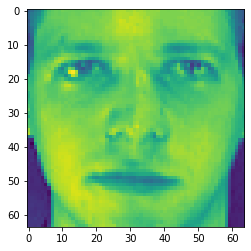

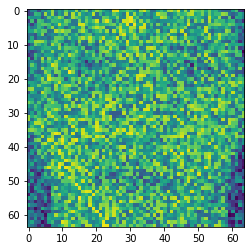

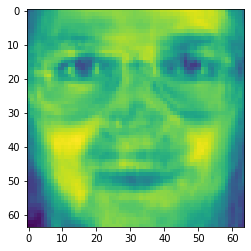

[0.23812722 0.13993962 0.07968614 0.04998332 0.03609846 0.0315694
 0.02426832 0.02036399 0.01958115 0.01672123 0.01595222 0.01436979
 0.01246741 0.01147133 0.01062878 0.00977719 0.00919004 0.00815478]


In [7]:
# load olivetti faces
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
bunch = fetch_olivetti_faces()
X, y = bunch.data, bunch.target
plt.imshow(X[0].reshape(64,64))
plt.show()
# add noise to first image
noisy_face = X[0] + np.random.random((4096,))
noisy_face = noisy_face.reshape((1,4096))
plt.imshow(noisy_face.reshape(64,64))
plt.show()
# fit pca, i.e. compute SVD of X and store matrix U[:p], where p = n_components
pca = PCA(18)
pca.fit(X)


# project noisy image to PC space using projected_image = np.dot(U[:p], image)
projected_image = pca.transform(noisy_face)
# reconstruct_image  by calling np.dot(U[:p], projected_image)
reconstructed_image = pca.inverse_transform(projected_image)
# we lost the variation of data on the last d-p principal components, because we reconstructed
plt.imshow(reconstructed_image.reshape(64,64))
plt.show()
# print explained_variance_ratio_
print(pca.explained_variance_ratio_)

## 1. PCA - Summary
---
So far:

 - want to find a projection of data that maximizes the variance along its axes
 - use Lagrangian formulation of this optimization problem and set the derivative to zero
 - ==> Eigenvalue problem of Covariance matrix
 - using SVD to compute eigenvalues and eigenvectors
 - projection onto the eigenvectors of $S$ computes directions of maximal variance

## 1. PCA - Applications
---
 - Preprocessing! PCA
  - removes correlation in variables by projecting onto direction of maximum variance
  - ==> can improve downscale estimators
  - feature reduction
  - visualization

## 2. t-SNE: stochastic neighbor embedding
---
<img src="img\p.png" alt="Drawing" style="width: 1024px;"/>

from the [original paper](http://www.cs.toronto.edu/~hinton/absps/tsnefinal.pdf) (Van der Maaten, Hinton, 2008)

## 2. t-SNE: stochastic neighbor embedding
---
<img src="img\q.png" alt="Drawing" style="width: 1024px;"/>

from the [original paper](http://www.cs.toronto.edu/~hinton/absps/tsnefinal.pdf) (Van der Maaten, Hinton, 2008)

## 2. t-SNE: stochastic neighbor embedding
---
<img src="img\k.png" alt="Drawing" style="width: 1024px;"/>

https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding

## 2. t-SNE: stochastic neighbor embedding
---
"A theoretical justification for our selection of the Student t-distribution is that it is closely related to the Gaussian distribution, as the Student t-distribution is an infinite mixture of Gaussians. A computationally convenient property is that it is much faster to evaluate the density of a point under a Student t-distribution than under a Gaussian because it does not involve an exponential, even though the Student t-distribution is equivalent to an infinite mixture of Gaussians with different variancces."

from the [original paper](http://www.cs.toronto.edu/~hinton/absps/tsnefinal.pdf) (Van der Maaten, Hinton, 2008)

## 3. LLE - Locally Linear Embedding
---
<img src="img\lle.gif" alt="Drawing" style="width: 400px;"/>

[Source](https://cs.nyu.edu/~roweis/lle/algorithm.html)

## 3. LLE - Locally Linear Embedding
---
<img src="img\lle.gif" alt="Drawing" style="width: 200px;"/>

**Reconstruction loss:**

 - 2. $l(W) = \sum_{i=1}^t \lVert x_i - \sum_{j=1}^K W_{ij}x_j\rVert^2$

**Embedding loss:**
 
 - 3. $\hat l(Y) = \sum_{i=1}^t \lVert y_i - \sum_{j=1}^t W_{ij}y_j\rVert^2$

## 3. LLE - optimizing reconstruction loss $l(W) = \sum_{i=1}^t \lVert x_i - \sum_{j=1}^K W_{ij}x_j\rVert^2$
---
**2. Reconstruct each point from his neighbors with linear weights**

 - The optimal weights are given by $w_j = \frac{\sum_kC_{jk}^{-1}}{\sum_{lm}C_{lm}^{-1}}$

which we are going to verify in the homework.

## 3. LLE - optimizing embedding loss $\hat l(Y) = \sum_{i=1}^t \lVert y_i - \sum_{j=1}^t W_{ij}y_j\rVert^2$
---
The derivation of how to solve this minimization is rather involved, if you are interested, see the [original paper](http://www.cs.columbia.edu/~jebara/6772/papers/lleintro.pdf) on page 10,11.

(1797, 64)
(200, 2)


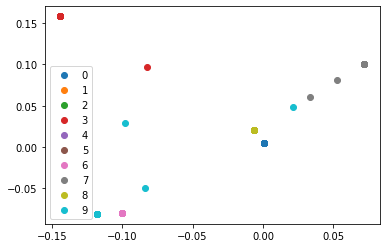

In [12]:
from sklearn.datasets import load_digits
from sklearn.manifold import LocallyLinearEmbedding
X, y = load_digits(return_X_y=True)
print(X.shape)
embedding = LocallyLinearEmbedding(n_components=2)
X_transform = embedding.fit_transform(X[:200])
print(X_transform.shape)
y = y[:200]

for i in [0,1,2,3,4,5,6,7,8,9]:
    plt.scatter(X_transform[y==i, 0], X_transform[y==i, 1], cmap=plt.cm.Spectral, label=f'{i}')
plt.legend()
plt.show()

# The End - happy to see you in the exercise session!